# Import Library

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("IMDB Movie Ratings Sentiment Analysis.csv")

In [3]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


# Data Preprocessing

In [4]:
df.shape

(40000, 2)

In [5]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 text     0
label    0
dtype: int64


In [6]:
# Check data types of each column
print("Data Types:\n", df.dtypes)

Data Types:
 text     object
label     int64
dtype: object


In [7]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

In [8]:
duplicate_rows

,text,label
2164,"I find it rather useless to comment on this ""m...",0
3236,An absolutely atrocious adaptation of the wond...,0
3428,When I first saw this film it was not an impre...,0
3652,Before I watched this tv movie I did not know ...,1
3787,What a clunker!<br /><br />It MUST have been m...,0
...,...,...
39229,I Enjoyed Watching This Well Acted Movie Very ...,1
39246,You do realize that you've been watching the E...,0
39508,(Spoilers)<br /><br />Oh sure it's based on Mo...,0
39681,It's been a long time since I last saw a movie...,0


In [9]:
# Check the distribution of labels
df['label'].value_counts()

label
0    20019
1    19981
Name: count, dtype: int64

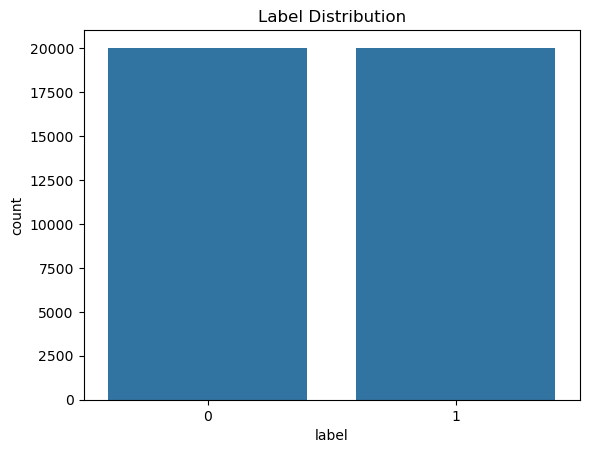

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='label')
plt.title("Label Distribution")
plt.show()

In [11]:
# Add a new column for text length
df['text_length'] = df['text'].apply(len)

In [12]:
df.head()

,text,label,text_length
0,I grew up (b. 1965) watching and loving the Th...,0,874
1,"When I put this movie in my DVD player, and sa...",0,1811
2,Why do people who do not know what a particula...,0,983
3,Even though I have great interest in Biblical ...,0,351
4,Im a die hard Dads Army fan and nothing will e...,1,983


In [13]:
df['text_length'].sort_values(ascending=False)

6378     13704
34167    12988
32922    12129
27424    10363
5878     10321
         ...  
28914       53
36009       51
32386       49
15400       41
26067       32
Name: text_length, Length: 40000, dtype: int64

In [14]:
# Identify potential outliers in text length
Q1 = df['text_length'].quantile(0.25)
Q3 = df['text_length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['text_length'] < lower_bound) | (df['text_length'] > upper_bound)]

In [15]:
outliers

,text,label,text_length
16,I really wanted to be able to give this film a...,1,5809
37,A feminist tract in which if you the viewer be...,0,3808
39,Superman II - The Richard Donner Cut should be...,0,5450
67,Airport '77 starts as a brand new luxury 747 p...,0,4466
75,I recently bought this movie for three bucks a...,1,3103
...,...,...,...
39944,The other reviewers are way WAAAAY off as to w...,1,2976
39954,"There is something in most of us, especially g...",0,4429
39959,The brainchild of comic strip pioneer Alex Ray...,1,3135
39981,The British production company Amicus is gener...,1,3511


In [16]:
# Display a few positive reviews
print("Positive Reviews Examples:\n", df[df['label'] == 1].head()['text'])

Positive Reviews Examples:
 4     Im a die hard Dads Army fan and nothing will e...
6     Finally watched this shocking movie last night...
8     It may be the remake of 1987 Autumn's Tale aft...
9     My Super Ex Girlfriend turned out to be a plea...
10    I can't believe people are looking for a plot ...
Name: text, dtype: object


In [17]:
# Display a few negative reviews
print("\nNegative Reviews Examples:\n", df[df['label'] == 0].head()['text'])


Negative Reviews Examples:
 0    I grew up (b. 1965) watching and loving the Th...
1    When I put this movie in my DVD player, and sa...
2    Why do people who do not know what a particula...
3    Even though I have great interest in Biblical ...
5    A terrible movie as everyone has said. What ma...
Name: text, dtype: object


In [18]:
df['text'][1]

"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: Awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. But, to my disappointment, not any of this is to be found in Atlantis: Milo's Return. Had I read some reviews first, I might not have been so let down. The following paragraph will be directed to those who have seen the first movie, and who enjoyed it primarily for the points mentioned.<br /><br />When the first scene appears, your in for a shock if you just picked Atlantis: Milo's Return from the display-case at your local videoshop (or whatever), and had the expectations I had. The music feels as a bad imitation of the first movie, and the voice cast has been replaced by a not so fitting one. (With the exception of a few characters, like the voice of Sweet). The actual drawings isnt that bad, 

In [19]:
df['text'][4]

'Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD\'s and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re run of certain episodes, Man and the hour, Enemy within the gates, Battle School and numerous others with a different edge. Introduction of a new General instead of Captain Square was a brilliant move - especially when he wouldn\'t cash the cheque (something that is rarely done now).<br /><br />It follows through the early years of getting equipment and uniforms, starting up and training. All in all, its a great film for a boring Sunday afternoon. <br /><br />Two draw backs. One is the Germans bogus dodgy accents (come one, Germans cant pronounced the letter "W" like us) and Two The casting of Liz Frazer instead of the familiar Janet Davis. I like Liz in other films like the carry ons but she doesn\'t carry it correctly in this and Janet Davis would have been the better choice.'

In [20]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Uncomment if running for the first time
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_movie_review(text):
    """
    Preprocesses a single movie review for sentiment analysis.
    Steps:
    - Converts text to lowercase
    - Removes HTML tags
    - Removes special characters and numbers
    - Tokenizes the text
    - Removes stop words
    - Lemmatizes tokens
    - Returns the cleaned text
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Rejoin tokens into a single string
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

In [21]:
# Example movie review
sample_review = df['text'][1]

# Preprocess the single review
preprocessed_review = preprocess_movie_review(sample_review)
print("Original Review:\n", sample_review)
print("\nPreprocessed Review:\n", preprocessed_review)

Original Review:
 When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: Awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. But, to my disappointment, not any of this is to be found in Atlantis: Milo's Return. Had I read some reviews first, I might not have been so let down. The following paragraph will be directed to those who have seen the first movie, and who enjoyed it primarily for the points mentioned.<br /><br />When the first scene appears, your in for a shock if you just picked Atlantis: Milo's Return from the display-case at your local videoshop (or whatever), and had the expectations I had. The music feels as a bad imitation of the first movie, and the voice cast has been replaced by a not so fitting one. (With the exception of a few characters, like the voice of Sweet). The actual drawing

In [22]:
# Apply to the entire dataset
df['processed_text'] = df['text'].apply(preprocess_movie_review)

In [23]:
df.head()

,text,label,text_length,processed_text
0,I grew up (b. 1965) watching and loving the Th...,0,874,grew b watching loving thunderbird mate school...
1,"When I put this movie in my DVD player, and sa...",0,1811,put movie dvd player sat coke chip expectation...
2,Why do people who do not know what a particula...,0,983,people know particular time past like feel nee...
3,Even though I have great interest in Biblical ...,0,351,even though great interest biblical movie bore...
4,Im a die hard Dads Army fan and nothing will e...,1,983,im die hard dad army fan nothing ever change g...


In [24]:
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Uncomment if running for the first time
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_movie_review_with_textblob(text):
    """
    Preprocesses a single movie review for sentiment analysis with TextBlob integration.
    Steps:
    - Converts text to lowercase
    - Removes HTML tags
    - Removes special characters and numbers
    - Corrects spelling using TextBlob
    - Tokenizes the text
    - Removes stop words
    - Lemmatizes tokens
    - Returns the cleaned text
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Use TextBlob for spell correction
    text = str(TextBlob(text).correct())
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Rejoin tokens into a single string
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text


In [25]:
# Example movie review
sample_review = df['text'][1]

In [26]:
# Preprocess the single review
preprocessed_review = preprocess_movie_review_with_textblob(sample_review)
print("Original Review:\n", sample_review)
print("\nPreprocessed Review:\n", preprocessed_review)

Original Review:
 When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: Awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. But, to my disappointment, not any of this is to be found in Atlantis: Milo's Return. Had I read some reviews first, I might not have been so let down. The following paragraph will be directed to those who have seen the first movie, and who enjoyed it primarily for the points mentioned.<br /><br />When the first scene appears, your in for a shock if you just picked Atlantis: Milo's Return from the display-case at your local videoshop (or whatever), and had the expectations I had. The music feels as a bad imitation of the first movie, and the voice cast has been replaced by a not so fitting one. (With the exception of a few characters, like the voice of Sweet). The actual drawing

In [27]:
df.head()

,text,label,text_length,processed_text
0,I grew up (b. 1965) watching and loving the Th...,0,874,grew b watching loving thunderbird mate school...
1,"When I put this movie in my DVD player, and sa...",0,1811,put movie dvd player sat coke chip expectation...
2,Why do people who do not know what a particula...,0,983,people know particular time past like feel nee...
3,Even though I have great interest in Biblical ...,0,351,even though great interest biblical movie bore...
4,Im a die hard Dads Army fan and nothing will e...,1,983,im die hard dad army fan nothing ever change g...


# Data spliting

In [28]:
X=df['processed_text']
y=df['label']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
tfidf_movie=TfidfVectorizer()
X_train_tfidf=tfidf_movie.fit_transform(X_train)
X_test_tfidf=tfidf_movie.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [33]:
lr_model=LogisticRegression()
lr_model.fit(X_train_tfidf,y_train)

LogisticRegression()

In [34]:
y_pred1=lr_model.predict(X_test_tfidf)

accracy=accuracy_score(y_test,y_pred1)
precision=precision_score(y_test,y_pred1)
recall=recall_score(y_test,y_pred1)
f1=f1_score(y_test,y_pred1)
cm=confusion_matrix(y_test,y_pred1)

print("accuracy",accracy)
print("precision",precision)
print("recall",recall)
print("f1",f1)
cm

accuracy 0.8878787878787879
precision 0.8827096583345659
recall 0.8967693463561233
f1 0.8896839594514013


array([[5752,  793],
       [ 687, 5968]], dtype=int64)

In [35]:
svc_model=SVC(kernel='linear')
svc_model.fit(X_train_tfidf,y_train)

SVC(kernel='linear')

In [36]:
y_pred2=svc_model.predict(X_test_tfidf)

accracy=accuracy_score(y_test,y_pred2)
precision=precision_score(y_test,y_pred2)
recall=recall_score(y_test,y_pred2)
f1=f1_score(y_test,y_pred2)
cm=confusion_matrix(y_test,y_pred2)

print("accuracy",accracy)
print("precision",precision)
print("recall",recall)
print("f1",f1)
cm

accuracy 0.8902272727272728
precision 0.8883915249179349
recall 0.8946656649135988
f1 0.891517556337501


array([[5797,  748],
       [ 701, 5954]], dtype=int64)

In [37]:
dtc_model=DecisionTreeClassifier()
dtc_model.fit(X_train_tfidf,y_train)

DecisionTreeClassifier()

In [38]:
y_pred3=dtc_model.predict(X_test_tfidf)

accracy=accuracy_score(y_test,y_pred3)
precision=precision_score(y_test,y_pred3)
recall=recall_score(y_test,y_pred3)
f1=f1_score(y_test,y_pred3)
cm=confusion_matrix(y_test,y_pred3)

print("accuracy",accracy)
print("precision",precision)
print("recall",recall)
print("f1",f1)
cm

accuracy 0.711590909090909
precision 0.7183379331493407
recall 0.7039819684447783
f1 0.7110875009486226


array([[4708, 1837],
       [1970, 4685]], dtype=int64)

In [39]:
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train_tfidf,y_train)

RandomForestClassifier()

In [40]:
y_pred4=rfc_model.predict(X_test_tfidf)

accracy=accuracy_score(y_test,y_pred4)
precision=precision_score(y_test,y_pred4)
recall=recall_score(y_test,y_pred4)
f1=f1_score(y_test,y_pred4)
cm=confusion_matrix(y_test,y_pred4)

print("accuracy",accracy)
print("precision",precision)
print("recall",recall)
print("f1",f1)
cm

accuracy 0.8441666666666666
precision 0.8569875776397515
recall 0.8293012772351616
f1 0.8429171439480718


array([[5624,  921],
       [1136, 5519]], dtype=int64)

In [41]:
gbc_model=GradientBoostingClassifier()
gbc_model.fit(X_train_tfidf,y_train)

GradientBoostingClassifier()

In [42]:
y_pred5=gbc_model.predict(X_test_tfidf)

accracy=accuracy_score(y_test,y_pred5)
precision=precision_score(y_test,y_pred5)
recall=recall_score(y_test,y_pred5)
f1=f1_score(y_test,y_pred5)
cm=confusion_matrix(y_test,y_pred5)

print("accuracy",accracy)
print("precision",precision)
print("recall",recall)
print("f1",f1)
cm

accuracy 0.805
precision 0.7747408105560791
recall 0.8646130728775356
f1 0.8172134639965913


array([[4872, 1673],
       [ 901, 5754]], dtype=int64)

In [43]:
knc_model=KNeighborsClassifier()
knc_model.fit(X_train_tfidf,y_train)

KNeighborsClassifier()

In [44]:
y_pred6=knc_model.predict(X_test_tfidf)

accracy=accuracy_score(y_test,y_pred6)
precision=precision_score(y_test,y_pred6)
recall=recall_score(y_test,y_pred6)
f1=f1_score(y_test,y_pred6)
cm=confusion_matrix(y_test,y_pred6)

print("accuracy",accracy)
print("precision",precision)
print("recall",recall)
print("f1",f1)
cm

accuracy 0.7562121212121212
precision 0.7296538821328344
recall 0.8204357625845229
f1 0.772386476163531


array([[4522, 2023],
       [1195, 5460]], dtype=int64)

In [45]:
mnb_model=MultinomialNB()
mnb_model.fit(X_train_tfidf,y_train)

MultinomialNB()

In [46]:
y_pred7=mnb_model.predict(X_test_tfidf)

accracy=accuracy_score(y_test,y_pred7)
precision=precision_score(y_test,y_pred7)
recall=recall_score(y_test,y_pred7)
f1=f1_score(y_test,y_pred7)
cm=confusion_matrix(y_test,y_pred7)

print("accuracy",accracy)
print("precision",precision)
print("recall",recall)
print("f1",f1)
cm

accuracy 0.8610606060606061
precision 0.8838987099856666
recall 0.8339594290007513
f1 0.8582031854028143


array([[5816,  729],
       [1105, 5550]], dtype=int64)

In [47]:
from sklearn.model_selection import GridSearchCV
# Define the model
lr_model = LogisticRegression()

# Define the parameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],  # Choose solvers based on dataset size
    'max_iter': [100, 200, 300]  # Increase iterations if needed
}

# Initialize GridSearchCV
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_tfidf, y_train)
best_lr_model = grid_search.best_estimator_

C:\ProgramData\anaconda3\new anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\new anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\new anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\new anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\new anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\new anaconda\Lib\sit

In [48]:
y_pred_lr = best_lr_model.predict(X_test_tfidf)

In [49]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
cm = confusion_matrix(y_test, y_pred_lr)

In [50]:
print("accuracy",accracy)
print("precision",precision)
print("recall",recall)
print("f1",f1)
cm

accuracy 0.8610606060606061
precision 0.8887556221889056
recall 0.8907588279489106
f1 0.8897560975609756


array([[5803,  742],
       [ 727, 5928]], dtype=int64)

In [51]:
import joblib

# Save the model and vectorizer
joblib.dump(svc_model, 'svc_model.pkl')
joblib.dump(tfidf_movie, 'tfidf_movie.pkl')

['tfidf_vectorizer.pkl']

In [54]:
df[['text', 'label']].iloc[22]

text     I don't care if some people voted this movie t...
label                                                    1
Name: 22, dtype: object

In [60]:
df['text'][1000]

"I'm very surprised that so many people don't like this movie. I think it's a lot better than most of the teen films that have come out recently - Ten Things I Hate About You ( can we say teeny bopper film and what was with the principle writing those porno novels ? ), Cruel Intentions ( where a character gives up their virginity because of a fun car ride ), and She's All That ( mediocre ). If your looking for something that's just fun - I say go with Never Been Kissed. My mom loved it and she hates movies ( one of her favorites is BEACHES ). This is a great fantasy about what you would do different if you could go back to high school. People who were outcasts in high school will probably like this movie better. It reminds me of 'Romy and Michele's High School Reunion'. And the ending puts me in the best mood. Sure the plot has been done, but how many recent movies can you honestly say haven't been done in one form or another. The cast is also charming. And for those who think Drew can

In [59]:
df['label'][1000]

1